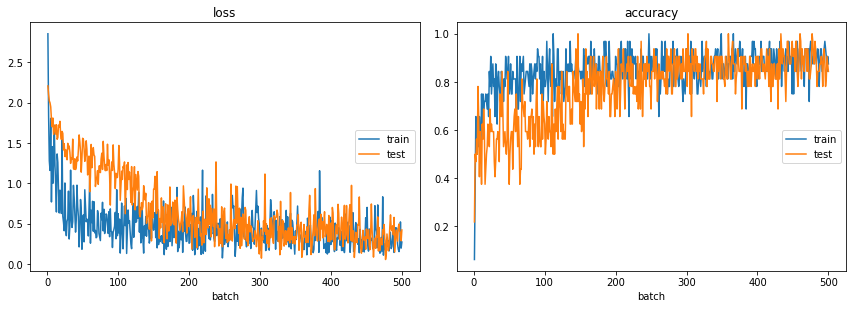

In [1]:
import beefly
import numpy as np
import tensorflow as tf


def simple_mnist(batch_num=1000, batch_size=32, image_shape=(28,28,1)):
    image = tf.keras.Input(shape=image_shape)
    x = tf.keras.layers.Conv2D(64, 3)(image)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    logit = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(image, logit)
    model.compile(loss=['sparse_categorical_crossentropy'], 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = np.expand_dims(X_train/127.5-1., axis=3)
    X_test = np.expand_dims(X_test/127.5-1., axis=3)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    beeplot = beefly.plot_metrics(valid_fmt='test_{}')
    for batch in range(batch_num):
        train_random = np.random.choice(range(X_train.shape[0]), batch_size, False)
        test_random = np.random.choice(range(X_test.shape[0]), batch_size, False)
        train_batch_image, train_batch_label = X_train[train_random], y_train[train_random]
        test_batch_image, test_batch_label = X_test[test_random], y_test[test_random]
        loss = model.train_on_batch(train_batch_image, train_batch_label)
        result = model.test_on_batch(test_batch_image, test_batch_label)
        if batch%2==0:
            beeplot.update({'loss':loss[0], 'accuracy': loss[1],
                            'test_loss': result[0], 'test_accuracy': result[1]})
            beeplot.draw()
    return model


if __name__ == '__main__':
    model = simple_mnist()

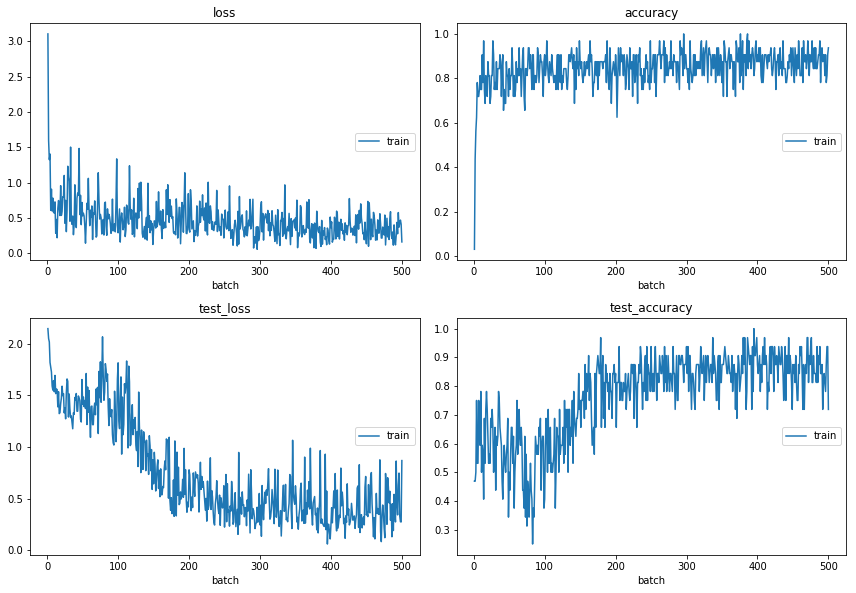

In [2]:
import beefly
import numpy as np
import tensorflow as tf


def simple_mnist(batch_num=1000, batch_size=32, image_shape=(28,28,1)):
    image = tf.keras.Input(shape=image_shape)
    x = tf.keras.layers.Conv2D(64, 3)(image)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    logit = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(image, logit)
    model.compile(loss=['sparse_categorical_crossentropy'], 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = np.expand_dims(X_train/127.5-1., axis=3)
    X_test = np.expand_dims(X_test/127.5-1., axis=3)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    beeplot = beefly.plot_metrics(wait_num=10)
    for batch in range(batch_num):
        train_random = np.random.choice(range(X_train.shape[0]), batch_size, False)
        test_random = np.random.choice(range(X_test.shape[0]), batch_size, False)
        train_batch_image, train_batch_label = X_train[train_random], y_train[train_random]
        test_batch_image, test_batch_label = X_test[test_random], y_test[test_random]
        loss = model.train_on_batch(train_batch_image, train_batch_label)
        result = model.test_on_batch(test_batch_image, test_batch_label)
        if batch%2==0:
            beeplot.update({'loss':loss[0], 'accuracy': loss[1],
                            'test_loss': result[0], 'test_accuracy': result[1]})
            beeplot.draw()
    return model


if __name__ == '__main__':
    model = simple_mnist()